# Принятие решений в бизнесе (А/В-тесты).

# Проект "Анализ гипотез об увеличении прибыли интернет-магазина"

<div class="toc"><ul class="toc-item"><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Приоритизация гипотез</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Расчет-коэффициентов-ICE-и-RICE" data-toc-modified-id="Расчет-коэффициентов-ICE-и-RICE-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Расчет коэффициентов ICE и RICE</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Графическое-изучение-результатов-A/B-теста" data-toc-modified-id="Графическое-изучение-результатов-A/B-теста-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Графическое изучение результатов A/B-теста</a></span></li><li><span><a href="#Поиск-аномалий" data-toc-modified-id="Поиск-аномалий-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Поиск аномалий</a></span></li><li><span><a href="#Анализ-статистической-значимости-различий" data-toc-modified-id="Анализ-статистической-значимости-различий-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Анализ статистической значимости различий</a></span></li><li><span><a href="#Графическое-изучение-результатов-A/B-теста-по-отфильтрованным-данным" data-toc-modified-id="Графическое-изучение-результатов-A/B-теста-по-отфильтрованным-данным-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Графическое изучение результатов A/B-теста по отфильтрованным данным</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

Имеется крупный интернет-магазина. Отделом маркетинга подготовлен список гипотез для увеличения выручки.

**Цель проекта:** приоритизировать гипотезы по увеличению прибыли интернет-магазина, запустить и проанализировать результаты A/B-теста

**Задачи:**

1. Часть №1. Приоритизация гипотез
    - Применить фреймворк ICE для приоритизации гипотез
    - Применить фреймворк RICE для приоритизации гипотез
2. Часть №2. Анализ A/B-теста
    - Изучить графики выручки, среднего чека, количества заказов, стоимости заказов по группам
    - Рассчитать статистическую значимость различий в среднем количестве заказов и среднем чеке по группам
    - Принять решение по результатам теста


**Данные**

Таблица hypothesis (гипотезы)

    Hypothesis — краткое описание гипотезы;
    Reach — охват пользователей по 10-балльной шкале;
    Impact — влияние на пользователей по 10-балльной шкале;
    Confidence — уверенность в гипотезе по 10-балльной шкале;
    Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
    
Таблица orders (заказы)

    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.
    
Таблица visitors (пользователи)

    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста
    


### Часть №1. Приоритизация гипотез

Загрузим библиотеки

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import math as mth
import datetime as dt
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters

In [2]:
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

#### Загрузка данных

In [3]:
try:
    hypo = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypo = pd.read_csv('E:/IT/Yandex/Projects/datasets/ab_hypothesis.csv')

In [3]:
hypo

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


#### Расчет коэффициентов ICE и RICE
Рассчитаем коэффициенты ICE и RICE для приоретизации гипотез

In [4]:
hypo['ICE'] = round((hypo['Impact'] * hypo['Confidence']) / hypo['Efforts'], 1)
hypo['RICE'] = (hypo['Reach'] * hypo['Impact'] * hypo['Confidence']) / hypo['Efforts']

In [5]:
display(hypo.sort_values(by='ICE', ascending=False).head())
display(hypo.sort_values(by='RICE', ascending=False).head())

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.2,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.3,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.2,112.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.0,40.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.0,56.0


,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.2,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.3,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.2,16.2


Первые 5 приоритетных гипотез при расчете обоих показателей одинаковые: 0, 2, 6, 7 и 8, однако расположены в разном порядке по приоритетности.

Без учета охвата аудитории, наиболее перспективными являются гипотезы 8, 0 и 7, показатель ICE для них выше 10. Однако по охвату аудитории, на которую повлияет нововведение, гипотезы 8 и 0 довольно малы. В то же время гипотеза №7 имеет максимальный охват аудитории, поэтому её введение имеет минимум в 2 раза выше показатель RICE, чем все остальные гипотезы.

#### Вывод

В связи с тем, что гипотеза №7 имеет высокий приоритет как без учета охвата аудитории, так и с его учетом, она представляется наиболее перспективной для дальнейшего тестирования.

### Часть №2. Анализ A/B-теста

#### Загрузка данных
Загрузим данные о результатах проведенного A/B-теста

In [5]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    orders = pd.read_csv('E:/IT/Yandex/Projects/datasets/ab_orders.csv')
    visitors = pd.read_csv('E:/IT/Yandex/Projects/datasets/ab_visitors.csv')

Изучим данные

In [6]:
# Определим функцию для знакомства с базой данных и проверки её на явные дубликаты
def database_check(db):
    print('Случайные 2 строки базы данных')
    display(db.sample(2, random_state=0))
    print('---')
    print('Общая информация о базе данных')
    db.info()
    print('---')
    print('Пропущенных значений в строках:')
    print(db.isna().sum())
    print('---')
    print('Явных дубликатов в базе данных:', db.duplicated().sum())

In [9]:
# Определим список баз данных для проверки
dtb = {
    "orders": orders,
    "visitors": visitors
    }
# Проведем знакомство с базами данных
for name, database in dtb.items():
    print('---')
    print('База данных', name)
    database_check(database)

---
База данных orders
Случайные 2 строки базы данных


,Unnamed: 0,transactionId,visitorId,date,revenue,group
700,700,2472751116,2328791559,2019-08-07,2070,B
621,621,380504587,1831140265,2019-08-29,26550,A


---
Общая информация о базе данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1197 non-null   int64 
 1   transactionId  1197 non-null   int64 
 2   visitorId      1197 non-null   int64 
 3   date           1197 non-null   object
 4   revenue        1197 non-null   int64 
 5   group          1197 non-null   object
dtypes: int64(4), object(2)
memory usage: 56.2+ KB
---
Пропущенных значений в строках:
Unnamed: 0       0
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
---
Явных дубликатов в базе данных: 0
---
База данных visitors
Случайные 2 строки базы данных


,Unnamed: 0,date,group,visitors
30,30,2019-08-31,A,699
32,32,2019-08-02,B,581


---
Общая информация о базе данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  62 non-null     int64 
 1   date        62 non-null     object
 2   group       62 non-null     object
 3   visitors    62 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.1+ KB
---
Пропущенных значений в строках:
Unnamed: 0    0
date          0
group         0
visitors      0
dtype: int64
---
Явных дубликатов в базе данных: 0


In [10]:
print('Временной срез данных: c {} по {}'.format(visitors['date'].min(), visitors['date'].max()))

Временной срез данных: c 2019-08-01 по 2019-08-31


Данные записаны в верхных форматах, кроме дат. Переведем их в формат datetime

In [8]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [11]:
display(orders.groupby('group', as_index=False).agg({'visitorId': 'nunique'}))
print('Процент пользователей от общего числа в группе A: {0:.0f}%, в группе B: {1:.0f}%'.format((503/1089*100), (586/1089*100)))

,group,visitorId
0,A,503
1,B,586


Процент пользователей от общего числа в группе A: 46%, в группе B: 54%


Первое различие между группами - разница на 8% в количестве пользователей, которые сделали заказы: в группе В заказов сделали больше.

Проверим, все ли пользователи уникальны в каждой из групп

In [10]:
group_a = orders[orders['group'] == 'A']['visitorId']
group_b = orders[orders['group'] == 'B']['visitorId']

duplicate_users = pd.Series(list(set(group_a) & set(group_b)))
print('Количество пользователей, присутствующих в обеих группах:', len(duplicate_users))

Количество пользователей, присутствующих в обеих группах: 58


Удалим такие записи, так как они нарушают чистоту эксперимента

In [11]:
orders = orders[np.logical_not(orders['visitorId'].isin(duplicate_users))]

База данных заказов (orders) содержит 1197 записей, среди которых явных дубликатов не выявлено. База данных посещений (visitors) содержит 62 записи, среди которых явных дубликатов не выявлено. Формат записи данных о датах изменен на datetime. Выявлено 58 пользователей, присутствующих в обеих группах: такие записи были удалены с целью не нарушать чистоты эксперимента.

Временной срез данных: с 1 по 31 августа 2019 года (31 день)

#### Графическое изучение результатов A/B-теста

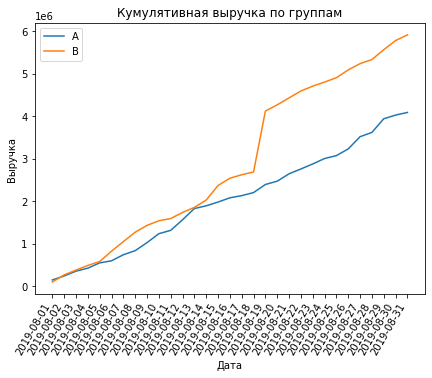

In [12]:
# Кумулятивная выручка по группам

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date','revenue', 'orders']]

# График
plt.figure(figsize=(7, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=60, ha='right')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Кумулятивная выручка по группам')
plt.legend()
plt.show()

Кумулятивная выручка по обеим группам стабильно повышается, без заметных периодов стагнации, что хорошо. Первую неделю теста выручка в обеих группах была практически идентичной, однако со второй недели группа В стала заметно опережать по выручке группу А. В районе 20.08.2019 выручка в группе В резко повысилась, значительно обогнав показатели группы А, что может быть связано с аномально крупными заказами в этот период. Из-за такого резкого единовременного повышения выручки в группе В, к концу изучаемого периода кумулятивная выручка этой группы оказалась значительно выше, чем у группы А.

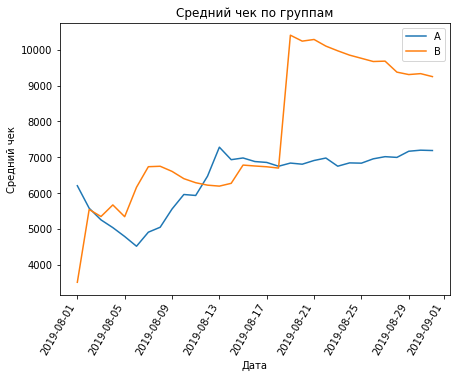

In [13]:
# Средний чек по группам

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

# График
plt.figure(figsize=(7, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=60, ha='right')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('Средний чек по группам')
plt.legend()
plt.show()

Первые две недели исследования средний чек в обеих группах сильно колебался, но к 20-м числам месяца в группе А он выровнялся около 7000 рублей. В то же время, в районе 20 августа средний чек группы В резко взлетел до 10000 рублей, после чего стал планомерно снижаться. Это ещё раз подтверждает гипотезу о том, что в эти числа был сделан аномально крупный заказ, который искажает общую картину

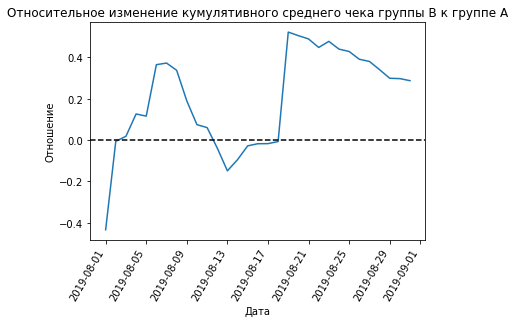

In [14]:
# Относительное изменение кумулятивного среднего чека группы B к группе A
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# График
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA']) - 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=60, ha='right')
plt.xlabel('Дата')
plt.ylabel('Отношение')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.show()

Не считая первых чисел и небольшого "провала" в середине месяца, средний чек в группе В был выше, чем в группе А, до 50%.

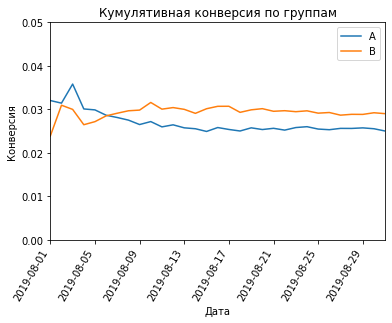

In [15]:
# Кумулятивная конверсия по группам
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

# График
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.axis(['2019-08-01', '2019-08-31', 0, 0.05])
plt.xticks(rotation=60, ha='right')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title('Кумулятивная конверсия по группам')
plt.legend()
plt.show()

Кумулятивная конверсия колебаласть первую неделю, но где-то со второй недели теста конверсия в группе В стала стабильно выше, чем в группе А.

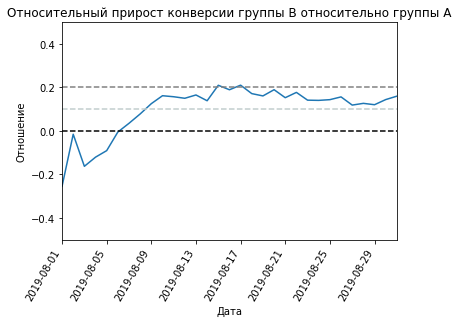

In [16]:
# Относительный прирост конверсии группы B относительно группы A
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date', 'conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# График
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA'] - 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='#C1CDCD', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])
plt.xticks(rotation=60, ha='right')
plt.xlabel('Дата')
plt.ylabel('Отношение')
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.show()

Предыдущий вывод подтверждается на графике относительного прироста конверсии. После первой недели конверсия в группе В стала стабильно на 10-20% выше, чем в группе А.

#### Поиск аномалий

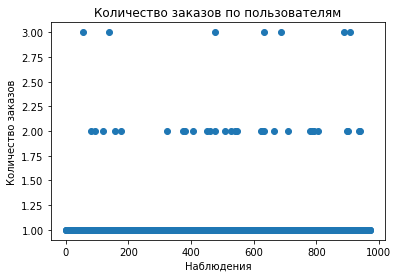

In [17]:
# Точечный график количества заказов по пользователям
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})

x_values = pd.Series(range(0, len(ordersByUsers)))

# График
plt.scatter(x_values, ordersByUsers['transactionId'])
plt.xlabel('Наблюдения')
plt.ylabel('Количество заказов')
plt.title('Количество заказов по пользователям')
plt.show()

In [18]:
# 95-й и 99-й перцентили количества заказов на пользователя
print(np.percentile(ordersByUsers['transactionId'], [95, 99]))

[1. 2.]


Всего 1% пользователей совершает более 2 заказов. Будем считать такие заказы аномалиями

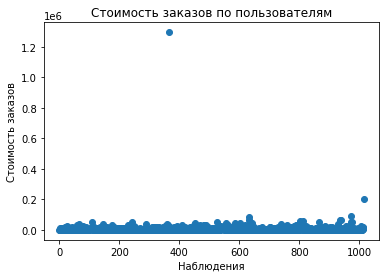

In [19]:
# Точечный график стоимостей заказов
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])
plt.xlabel('Наблюдения')
plt.ylabel('Стоимость заказов')
plt.title('Стоимость заказов по пользователям')
plt.show()

In [20]:
# 95-й и 99-й перцентили стоимости заказов
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Всего 5% пользователей совершает покупки дороже 26785 рублей. Будем считать все заказы дороже этой суммы аномалиями.

Таким образом, пользователи, совершающие 3 и более заказов в месяц считаются аномальными, и заказы стоимостью более 26785 рублей тоже считаем аномальными.

In [35]:
# Передадим переменным значения перцентилей, чтобы использовать в дальнейшей фильтрации данных
an_orders = int(np.percentile(ordersByUsers['transactionId'], [99]))
an_transactions = int(np.percentile(orders['revenue'], [95]))

#### Анализ статистической значимости различий

Проверим гипотезы о существовании различий между группами А и В.

**Гипотеза №1**

Н0: Конверсия в группе А и В равны, Н1: Конверсия в группе А и В не равны

Зададим оптимальный уровень значимости alpha=0.05. Для проверки гипотезы применим U-критерий Манна — Уитни, хорошо подходящий для выборок с распределением, отличным от нормального, с большим количеством выбросов.

Расчитаем на основе таблицы заказов, сколько заказов было сделано каждый день

In [22]:
orders_per_day = orders.pivot_table(index=['date', 'group'], values=['revenue'], aggfunc=['count', 'sum']).reset_index()
orders_per_day.columns=['date', 'group', 'order_amount', 'total_revenue']
orders_per_day.head()

,date,group,order_amount,total_revenue
0,2019-08-01,A,23,142779
1,2019-08-01,B,17,59758
2,2019-08-02,A,19,91602
3,2019-08-02,B,23,162043
4,2019-08-03,A,24,112473


In [23]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors.query('group == "A"')['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors.query('group == "B"')['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('---')
print("p-value {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

if stats.mannwhitneyu(sampleA, sampleB)[1] > 0.05:
    print('Причин отвергнуть нулевую гипотезу не найдено')
else:
    print('Отвергаем нулевую гипотезу')
    
print(
    "Разница между группой В и А {0:.3f}%".format((
        (orders_per_day.query('group == "B"')['order_amount'].sum() / visitors.query('group == "B"')['visitors'].sum())
        / (orders_per_day.query('group == "A"')['order_amount'].sum() / visitors.query('group == "A"')['visitors'].sum())
        - 1) * 100)
)

---
p-value 0.011
Отвергаем нулевую гипотезу
Разница между группой В и А 15.980%


p-value = 0.011, что меньше 0.05, поэтому нулевую гипотезу о равенстве выборок мы не можем подтвердить. Различия в конверсии имеются в пользу группы В и это различие составляет почти 16%.

**Гипотеза №2**

Н0: Средние чеки в группе А и В равны, Н1: Средние чеки в группе А и В не равны

Зададим оптимальный уровень значимости alpha=0.05. Для проверки гипотезы применим U-критерий Манна — Уитни, хорошо подходящий для выборок с распределением, отличным от нормального, с большим количеством выбросов.

In [24]:
# Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

print('p-value {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

if (stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]) > 0.05:
    print('Причин отвергнуть нулевую гипотезу не найдено')
else:
    print('Отвергаем нулевую гипотезу')

    
print('Разница между группой В и А {0:.3f}%'.format((orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1) * 100)) 

p-value 0.829
Причин отвергнуть нулевую гипотезу не найдено
Разница между группой В и А 28.660%


В среднем чеке по неочищенным данными сомнений не имеется: средние чеки в обеих группах статистически равны. Но, тем не менее, в группе В он на 29% больше, чем в группе А.

#### Вывод

**Описание данных**

В исследовании были проанализированы результаты А/В-теста по проверке гипотезы о улучшении интернет-магазина с целью увеличения выручки. Основными параметрами выступали: количество пользователей, их конверсия, общая выручка, средний чек покупки.

Тестирвание велось 1 месяц и затронуло около 1 тысячи пользователей, почти равно распределенных между двумя группами.
В базе данных присутствует 58 пользователей, которые сделали заказы в обоих группах. Такие пользователи были отфильтрованы, чтобы не искажать результаты.

**Результаты**

По результатам тестирования было установлено:

1. Есть статистически значимые различия по среднему количеству заказов между группами: в группе В стабильно покупают чаще на 16%
2. Нет статистически значимого различия по среднему чеку между группами, несмотря на то, что средний чек на 29% больше в группе В, чем в группе А

**Выводы**

На основе полученных результатов, сделать выводы об абсолютной успешности по всем показателям той или иной группы нельзя. Группа В стабильно привлекает больше заказов, причем часть из этих заказов крупнее, чем средний чек. Но без учета крупных заказов, динамика среднего чека в группе А и группе В ещё не устоялась.
Тем не менее, при примерно равном среднем чеке, в связи с большей конверсией в группе В, общая выручка в ней выше на 16%. 

Следовательно, *тест можно остановить и зафиксировать победу группы В*. 

**Рекомендации**

Необходимо зафиксировать увеличение конверсии пользователей и проработать гипотезы об увеличении среднего чека заказов.